In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(context="paper", font="monospace")

def merge_pandas(pandas_path, hyperparameter):
    df = pd.DataFrame(columns=["Loss type", "Loss value", "Loss index", "Type", hyperparameter])

    for test in os.listdir(pandas_path):
        test_path = os.path.join(pandas_path, test)
        df_train = pd.read_csv(test_path+'/training_loss.csv')

        df_train["Type"] = "Train"

        df_test = pd.read_csv(test_path+'/test_loss.csv')
        df_test["Type"] = "Validation"

        # print(df_train.head())
        # print(df_test.head())
        merged = pd.concat([df_train, df_test], ignore_index = True)

        if "Unnamed: 0" in merged.columns:
            merged.drop("Unnamed: 0", axis=1, inplace=True)
        
        merged[hyperparameter] = test
        # print(merged)
        df = pd.concat([df, merged], ignore_index = True)

    df.to_csv(f"ALL_{hyperparameter}.csv", index=False)
    return df

def plot_pandas(df, hyperparameter):

    fig, ax = plt.subplots(ncols=3,figsize=(18,5))
    ax[0].sharey(ax[1])

    encoderDecoder_loss = df[(df["Loss type"] == "EncoderDecoder/EpochLoss")]
    refiner_loss = df[(df["Loss type"] == "Refiner/EpochLoss")]
    refiner_iou = df[(df["Loss type"] == "Refiner/IoU")]

    sns.lineplot(data=encoderDecoder_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type",ax=ax[0], palette=sns.color_palette("bright"))
    sns.lineplot(data=refiner_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type", ax=ax[1], palette=sns.color_palette("bright"))
    ax[1].get_legend().remove()
    sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue=hyperparameter,ax=ax[2], palette=sns.color_palette("bright"))
    ax[2].get_legend().remove()

    ax[0].legend(loc='lower left')

In [6]:
import pandas as pd
import os

pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-LR/pandas"
merge_pandas(pandas_path, "Learning Rate")

pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-P/pandas"
merge_pandas(pandas_path, "Erasing Probability")

pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-MaskSize/pandas"
merge_pandas(pandas_path, "Mask Size")

,Loss type,Loss value,Loss index,Type,Mask Size
0,EncoderDecoder/EpochLoss,1.332488,154,Train,10-40
1,Refiner/EpochLoss,0.992239,154,Train,10-40
2,EncoderDecoder/EpochLoss,1.177984,155,Train,10-40
3,Refiner/EpochLoss,0.854499,155,Train,10-40
4,EncoderDecoder/EpochLoss,1.148378,156,Train,10-40
...,...,...,...,...,...
215,Refiner/EpochLoss,1.607250,163,Validation,30-40
216,Refiner/IoU,0.524441,163,Validation,30-40
217,EncoderDecoder/EpochLoss,1.661383,164,Validation,30-40
218,Refiner/EpochLoss,1.644345,164,Validation,30-40


### Plot summary

In [7]:
df_lr = pd.read_csv(f"ALL_Learning Rate.csv")
df_lr = df_lr[(df_lr["Loss type"] == "Refiner/IoU")]

df_p = pd.read_csv(f"ALL_Erasing Probability.csv")
df_p = df_p[(df_p["Loss type"] == "Refiner/IoU")]

df_m = pd.read_csv(f"ALL_Mask Size.csv")
df_m = df_m[(df_m["Loss type"] == "Refiner/IoU")]



Text(0, 0.5, '')

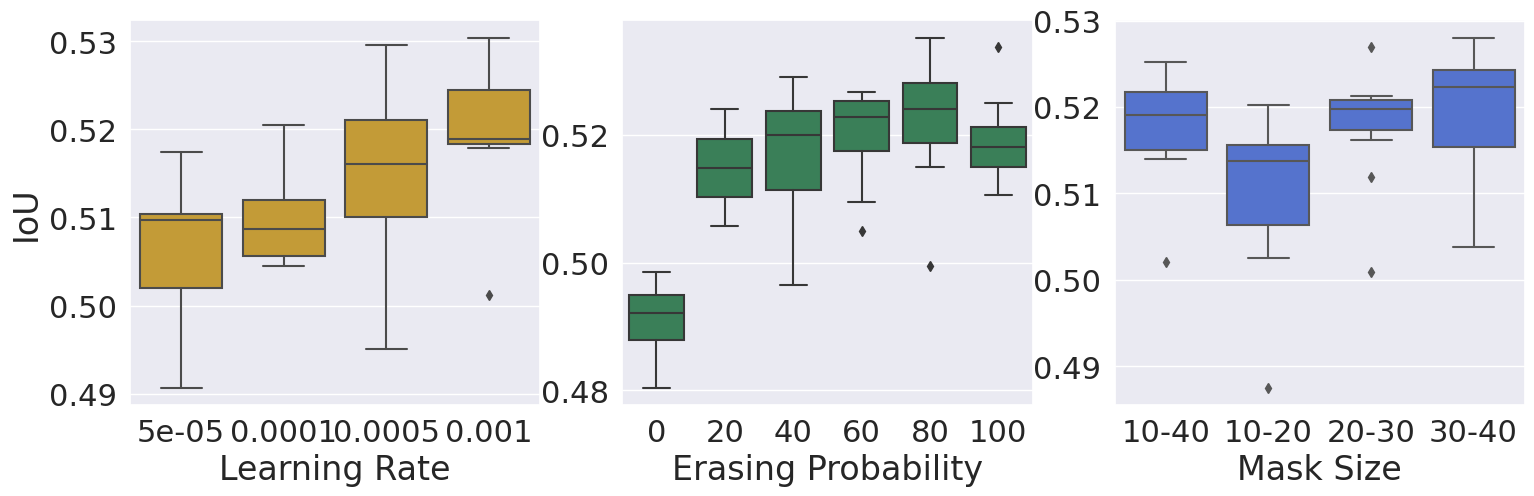

In [9]:
sns.set(font_scale=2)

fig, ax = plt.subplots(ncols=3,figsize=(18,5))

sns.boxplot(data=df_lr,  x="Learning Rate", y="Loss value",  color="goldenrod",  ax=ax[0])
sns.boxplot(data=df_p,  x="Erasing Probability", y="Loss value",  color="seagreen", ax=ax[1])
sns.boxplot(data=df_m,  x="Mask Size", y="Loss value", color="royalblue", ax=ax[2])

# Use scatterplots instead

# df_lr = df_lr.groupby("Learning Rate").max("Loss value")
# df_p = df_p.groupby("Erasing Probability").max("Loss value")
# df_m = df_m.groupby("Mask Size").max("Loss value")

# sns.scatterplot(data=df_lr,  x="Learning Rate", y="Loss value",  color="goldenrod",  ax=ax[0])
# sns.scatterplot(data=df_p,  x="Erasing Probability", y="Loss value",  color="seagreen", ax=ax[1])
# sns.scatterplot(data=df_m,  x="Mask Size", y="Loss value", color="royalblue", ax=ax[2])

ax[0].set_ylabel("IoU")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

[Text(0.5, 0, ''), Text(0, 0.5, 'IoU')]

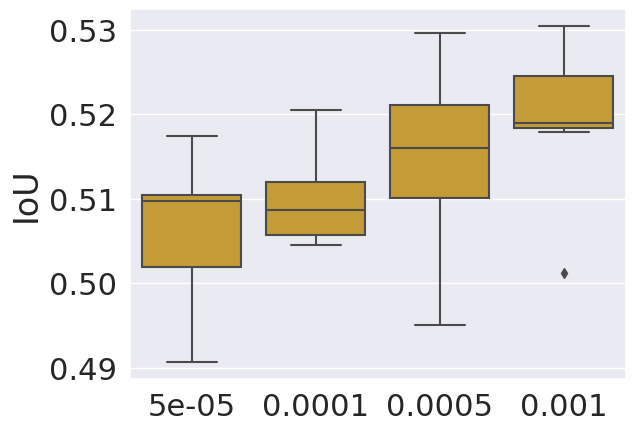

In [9]:
sns.set(font_scale=2)
g = sns.boxplot(data=df_lr,  x="Learning Rate", y="Loss value",  color="goldenrod")
g.set(xlabel ="", ylabel = "IoU")

[Text(0.5, 0, ''), Text(0, 0.5, 'IoU')]

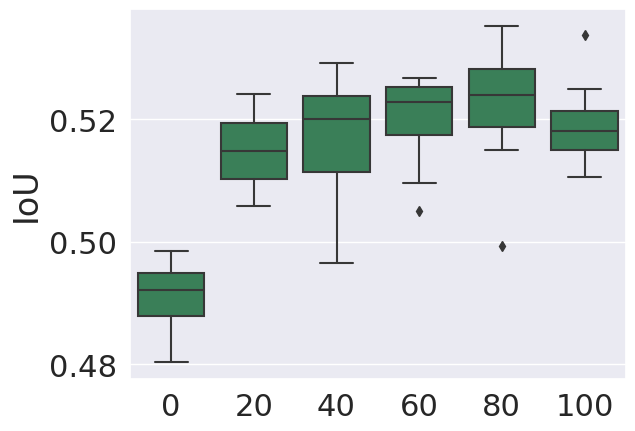

In [10]:
sns.set(font_scale=2)
g = sns.boxplot(data=df_p,  x="Erasing Probability", y="Loss value",  color="seagreen")
g.set(xlabel ="", ylabel = "IoU")

[Text(0.5, 0, ''), Text(0, 0.5, 'IoU')]

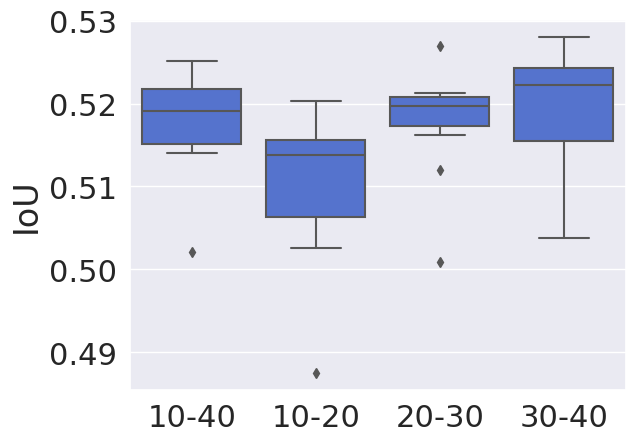

In [11]:
g = sns.boxplot(data=df_m,  x="Mask Size", y="Loss value",  color="royalblue")
g.set(xlabel ="", ylabel = "IoU")

### Refiner/IoU

/tmp/ipykernel_47372/3720513546.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue="Learning Rate", palette=sns.color_palette("bright"))


<AxesSubplot:xlabel='Loss index', ylabel='Loss value'>

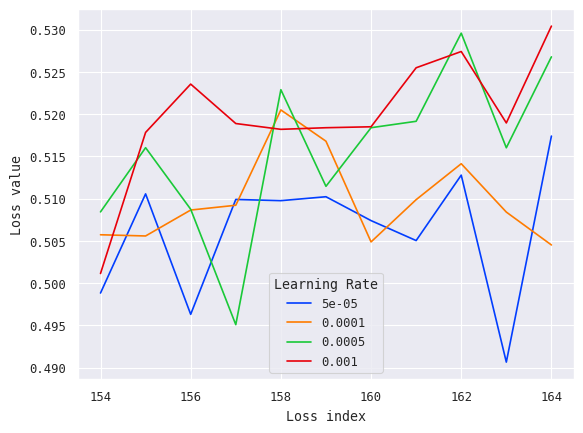

In [22]:
refiner_iou = df_lr[(df_lr["Loss type"] == "Refiner/IoU")]
sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue="Learning Rate", palette=sns.color_palette("bright"))


### LR

/tmp/ipykernel_47372/4201474061.py:43: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=encoderDecoder_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type",ax=ax[0], palette=sns.color_palette("bright"))
/tmp/ipykernel_47372/4201474061.py:44: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=refiner_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type", ax=ax[1], palette=sns.color_palette("bright"))
/tmp/ipykernel_47372/4201474061.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue=hyperparameter,ax=ax[2], palette=sns.color_palette("bright"))


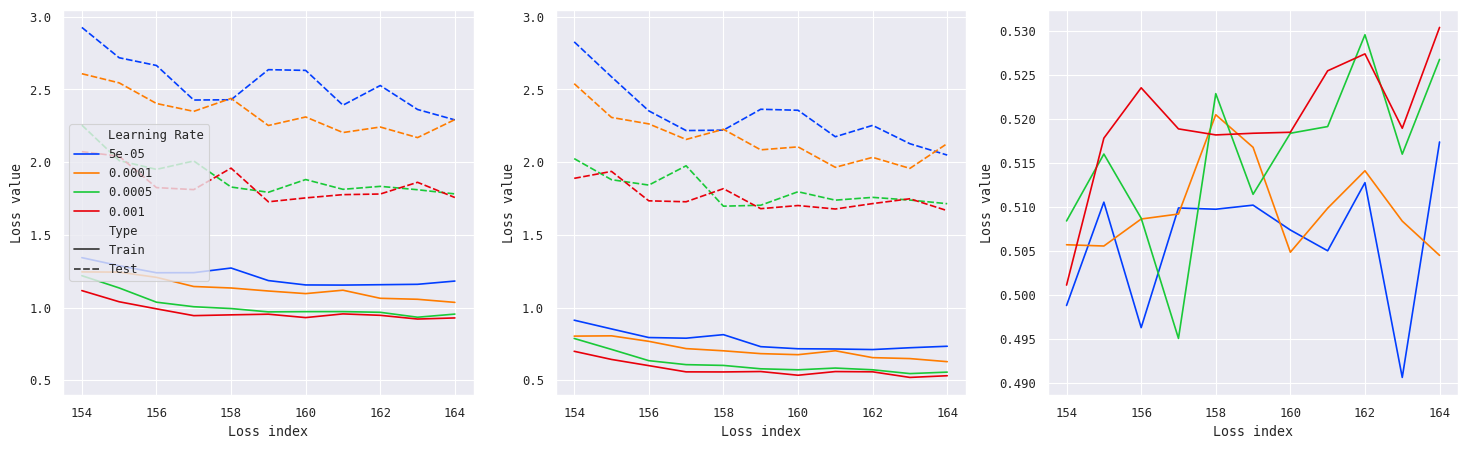

In [28]:
df_lr = pd.read_csv(f"ALL_Learning Rate.csv")
plot_pandas(df_lr, "Learning Rate")

### Erasing Probability

/tmp/ipykernel_47372/4201474061.py:43: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=encoderDecoder_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type",ax=ax[0], palette=sns.color_palette("bright"))
/tmp/ipykernel_47372/4201474061.py:44: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=refiner_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type", ax=ax[1], palette=sns.color_palette("bright"))
/tmp/ipykernel_47372/4201474061.py:46: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue=hyperparameter,ax=ax[2], palette=sns.color_palette("bright"))


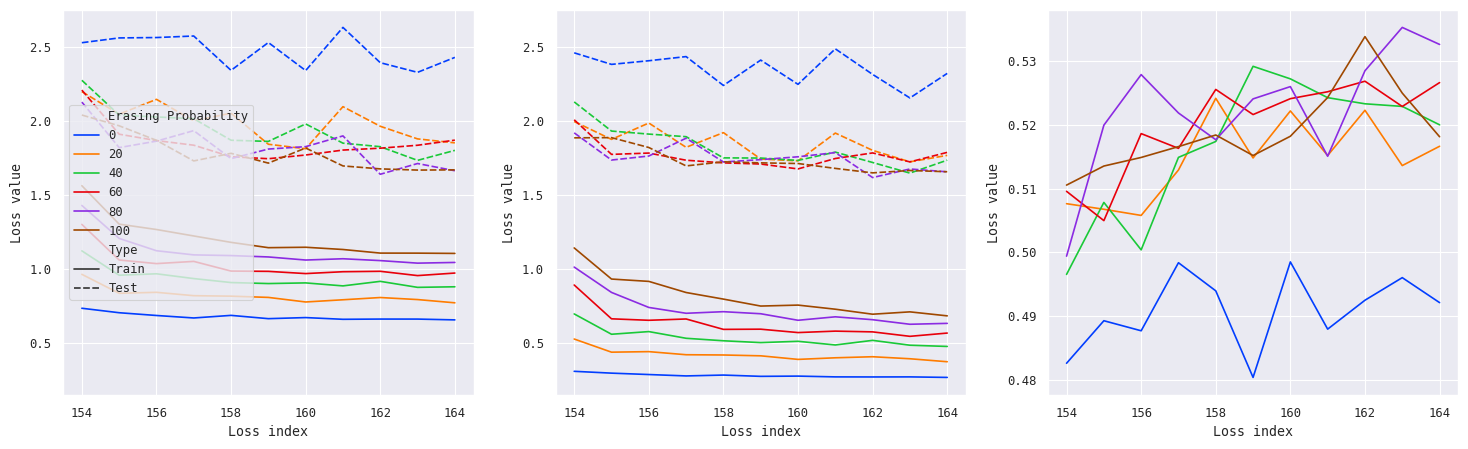

In [29]:
df_p = pd.read_csv(f"ALL_Erasing Probability.csv")
plot_pandas(df_p, "Erasing Probability")

# Mask size

/tmp/ipykernel_7270/3097994907.py:43: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=encoderDecoder_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type",ax=ax[0], palette=sns.color_palette("bright"))
/tmp/ipykernel_7270/3097994907.py:44: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=refiner_loss, x="Loss index", y="Loss value", hue=hyperparameter, style="Type", ax=ax[1], palette=sns.color_palette("bright"))
/tmp/ipykernel_7270/3097994907.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue=hyperparameter,ax=ax[2], palette=sns.color_palette("bright"))


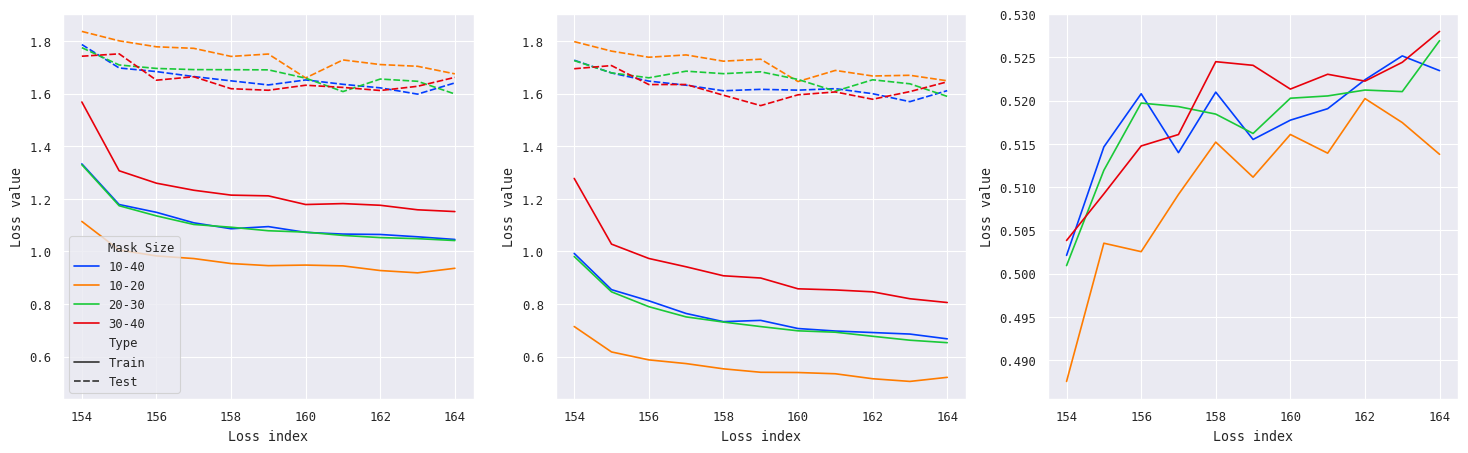

In [11]:
df_m = pd.read_csv(f"ALL_Mask Size.csv")
plot_pandas(df_m, "Mask Size")

/tmp/ipykernel_13822/2653720349.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  g = sns.lineplot(data=refiner_loss, x="Loss index", y="Loss value", style="Type", hue="Erasing Area %", ax=ax[0], palette=sns.color_palette("bright"))
/tmp/ipykernel_13822/2653720349.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  f = sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue="Erasing Area %", linestyle="dashed",ax=ax[1], palette=sns.color_palette("bright"))


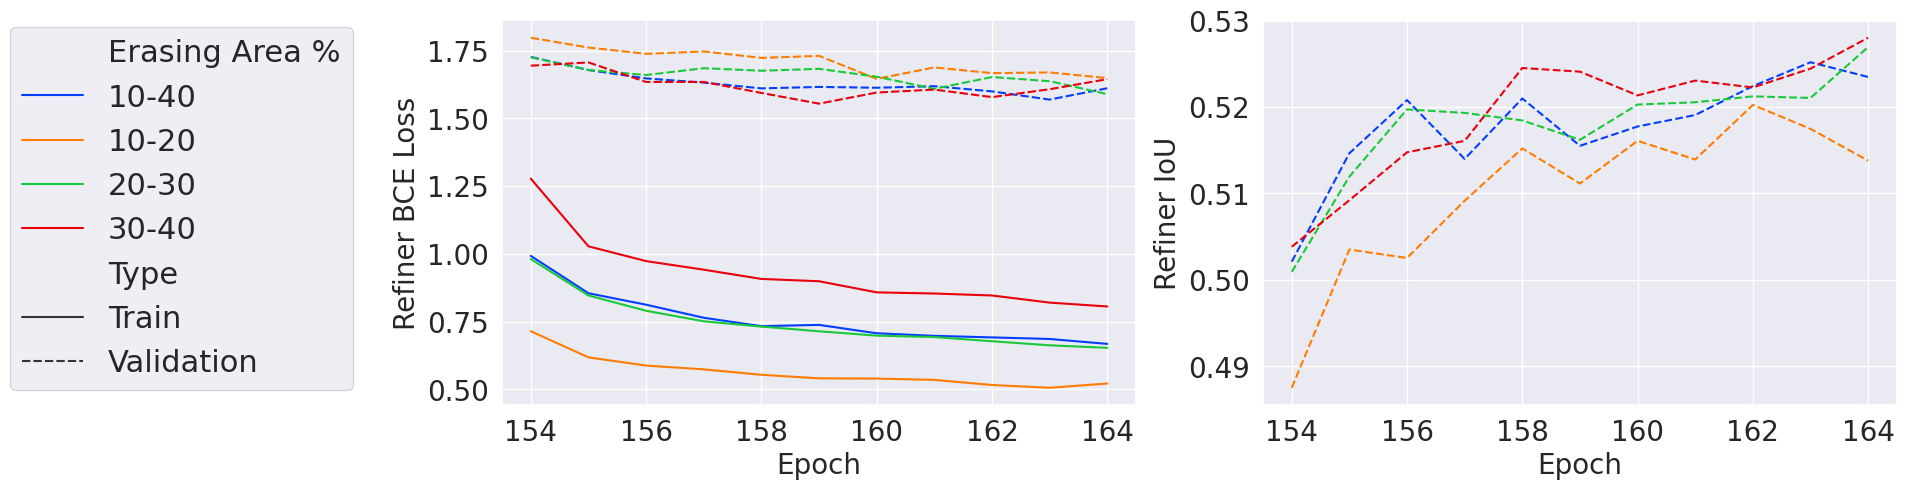

In [13]:
hyperparameter = "Mask Size"
df_m = pd.read_csv(f"ALL_{hyperparameter}.csv")

df_m.columns = df_m.columns.str.replace('Mask Size', 'Erasing Area %')

fig, ax = plt.subplots(ncols=2,figsize=(18,5))
sns.set(font_scale=2)
refiner_loss = df_m[(df_m["Loss type"] == "Refiner/EpochLoss")]
refiner_iou = df_m[(df_m["Loss type"] == "Refiner/IoU")]

g = sns.lineplot(data=refiner_loss, x="Loss index", y="Loss value", style="Type", hue="Erasing Area %", ax=ax[0], palette=sns.color_palette("bright"))
f = sns.lineplot(data=refiner_iou, x="Loss index", y="Loss value", hue="Erasing Area %", linestyle="dashed",ax=ax[1], palette=sns.color_palette("bright"))

g.set_xlabel("Epoch",fontsize=20)
g.set_ylabel("Refiner Loss",fontsize=20)
g.tick_params(labelsize=20)

f.set_xlabel("Epoch",fontsize=20)
f.set_ylabel("Refiner IoU",fontsize=20)
f.tick_params(labelsize=20)

ax[1].get_legend().remove()
ax[0].legend(loc='lower left', bbox_to_anchor=(-0.8, 0))

# Evaluation

In [6]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def compare_ore(df):
    sns.set(font_scale=1.5)

    mask_size = [ dataset.split("_")[-1] for dataset in df["Dataset"].values.tolist()]
    df["Erasing area percentage"] = mask_size
    fig, ax = plt.subplots(ncols=1)
    fig.tight_layout()

    ax.axhline(df["Max IoU"][(df["Checkpoint"]=="Pix2Vox-A")].values[0], 0, 1, linewidth=1, zorder=0,linestyle="dashed", color="b")
    ax.axhline(df["Max IoU"][(df["Checkpoint"]=="Pix2Vox-A")].values[1], 0, 1, linewidth=1, zorder=0,linestyle="dashed", color="orange")
    ax.axhline(df["Max IoU"][(df["Checkpoint"]=="Pix2Vox-A")].values[2], 0, 1, linewidth=1, zorder=0,linestyle="dashed", color="g")

    g = sns.scatterplot(data=df, x="Checkpoint", y="Max IoU", hue="Dataset", style="Dataset", s=300, ax=ax)
    g.set_ylabel("IoU")
    g.set_yticks(np.arange(0,0.7,0.1))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.45))
    plt.setp(g.get_xticklabels(), rotation=90)


### ShapeNet & Pix3D

In [275]:
pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ShapeNet/pandas/"
df_s = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df_s["Checkpoint"] = pd.Categorical(df_s["Checkpoint"], ["Pix2Vox-A", "Erasing_10-20", "Erasing_20-30", "Erasing_30-40", "Erasing_10-40"])
df_s = df_s.sort_values(["Max IoU"]).reset_index(drop=True)
df_s

pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-Pix3D/pandas/"
df_pix3D = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df_pix3D["Checkpoint"] = pd.Categorical(df_pix3D["Checkpoint"], ["Pix2Vox-A","Erasing_10-40", "Erasing_10-20", "Erasing_20-30", "Erasing_30-40"])
df_pix3D = df_pix3D.sort_values(["Max IoU"])
df_pix3D

df_both = pd.concat([df_s, df_pix3D], axis=0).reset_index(drop=True)
df_both

,Dataset,Checkpoint,Max IoU,t=0.20,t=0.30,t=0.40,t=0.50
0,ShapeNet,Erasing_10-20,0.554645,0.549586,0.554645,0.550782,0.536393
1,ShapeNet,Erasing_10-40,0.554970,0.548399,0.554970,0.551357,0.538188
2,ShapeNet,Erasing_30-40,0.556626,0.552577,0.556626,0.550110,0.534240
3,ShapeNet,Erasing_20-30,0.557404,0.553659,0.557404,0.551601,0.537721
4,ShapeNet,Pix2Vox-A,0.566574,0.563771,0.566574,0.563067,0.549305
5,Pix3D,Pix2Vox-A,0.183428,0.183428,0.165319,0.147185,0.124242
6,Pix3D,Erasing_10-20,0.198990,0.198990,0.183933,0.163147,0.130056
7,Pix3D,Erasing_10-40,0.207558,0.207558,0.192097,0.166489,0.132708
8,Pix3D,Erasing_20-30,0.208005,0.208005,0.190609,0.166875,0.138152
9,Pix3D,Erasing_30-40,0.212392,0.212392,0.189454,0.156490,0.120720


[None, None, None, None, None, None, None, None, None, None]

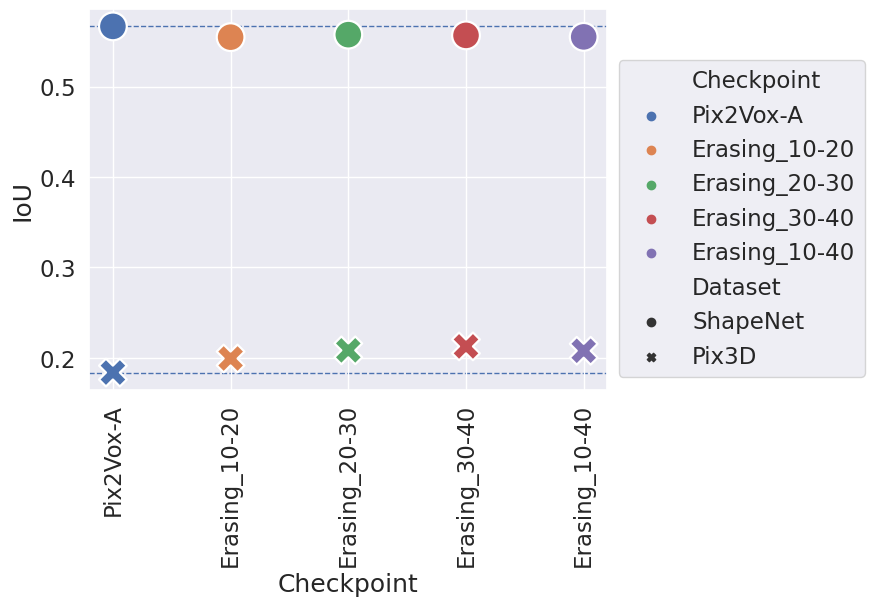

In [289]:
fig, ax = plt.subplots(ncols=1, sharey=True)
fig.tight_layout()
sns.set(font_scale=1.5)

g = sns.scatterplot(data=df_both, x="Checkpoint", y="Max IoU", style="Dataset", hue="Checkpoint", s=400, ax=ax)
g.set_ylabel("IoU")

ax.axhline(df_both["Max IoU"][(df_both["Dataset"]=="ShapeNet") & (df_both["Checkpoint"]=="Pix2Vox-A")].values[0], 0, 1, linewidth=1, zorder=0,linestyle="dashed", color="b")
ax.axhline(df_both["Max IoU"][(df_both["Dataset"]=="Pix3D") & (df_both["Checkpoint"]=="Pix2Vox-A")].values[0], 0, 1, linewidth=1, zorder=0,linestyle="dashed", color="b")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.45))
plt.setp(g.get_xticklabels(), rotation=90)

#### ORE_Random

In [4]:
pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ORE_Random/pandas/"
df = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df["Checkpoint"] = pd.Categorical(df["Checkpoint"], ["Pix2Vox-A", "Erasing_10-20", "Erasing_20-30", "Erasing_30-40", "Erasing_10-40"])
df["Dataset"] = pd.Categorical(df["Dataset"], ["ORE_Random_15", "ORE_Random_25", "ORE_Random_50"])

df = df.sort_values(["Checkpoint","Dataset"]).reset_index(drop=True)

df['IoU change'] = df['Max IoU'].pct_change()
df['IoU change'][df.loc[:,('IoU change')]>0] = np.NaN

print("Avg IoU loss over all fine-tuned models when going from ORE_15% to ORE_25%")
print(df['IoU change'][(df['Dataset']=="ORE_Random_25") & (df["Checkpoint"]!="Pix2Vox-A")].mean())
print("Avg IoU loss over all fine-tuned models when going from ORE_25% to ORE_50%")
print(df['IoU change'][(df['Dataset']=="ORE_Random_50") & (df["Checkpoint"]!="Pix2Vox-A")].mean())

print("Avg IoU over all fine-tuned models on ORE_15%")
print(df['Max IoU'][(df['Dataset']=="ORE_Random_15") & (df["Checkpoint"]!="Pix2Vox-A")].mean())
print("Avg IoU over all fine-tuned models on ORE_25%")
print(df['Max IoU'][(df['Dataset']=="ORE_Random_25") & (df["Checkpoint"]!="Pix2Vox-A")].mean())
print("Avg IoU over all fine-tuned models on ORE_50%")
print(df['Max IoU'][(df['Dataset']=="ORE_Random_50") & (df["Checkpoint"]!="Pix2Vox-A")].mean())

df

Avg IoU loss over all fine-tuned models when going from ORE_15% to ORE_25%
-0.04688923191694139
Avg IoU loss over all fine-tuned models when going from ORE_25% to ORE_50%
-0.21494687345631752
Avg IoU over all fine-tuned models on ORE_15%
0.5373425354267276
Avg IoU over all fine-tuned models on ORE_25%
0.5121312819575025
Avg IoU over all fine-tuned models on ORE_50%
0.4022217306391491


/tmp/ipykernel_5697/3584134428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IoU change'][df.loc[:,('IoU change')]>0] = np.NaN


,Dataset,Checkpoint,Max IoU,t=0.20,t=0.30,t=0.40,t=0.50,IoU change
0,ORE_Random_15,Pix2Vox-A,0.477722,0.477722,0.458111,0.436237,0.406498,NaN
1,ORE_Random_25,Pix2Vox-A,0.399899,0.399899,0.373128,0.346163,0.310910,-0.162904
2,ORE_Random_50,Pix2Vox-A,0.225373,0.225373,0.191595,0.162083,0.128475,-0.436425
3,ORE_Random_15,Erasing_10-20,0.541734,0.541734,0.533225,0.516020,0.490685,NaN
4,ORE_Random_25,Erasing_10-20,0.509810,0.509810,0.496554,0.473425,0.440643,-0.058930
5,ORE_Random_50,Erasing_10-20,0.360715,0.360715,0.329934,0.286656,0.227487,-0.292452
6,ORE_Random_15,Erasing_20-30,0.533949,0.533949,0.520316,0.497863,0.472872,NaN
7,ORE_Random_25,Erasing_20-30,0.507213,0.507213,0.488977,0.462316,0.433447,-0.050073
8,ORE_Random_50,Erasing_20-30,0.387823,0.387823,0.351875,0.303877,0.252544,-0.235385
9,ORE_Random_15,Erasing_30-40,0.535396,0.535396,0.520199,0.495015,0.465461,NaN


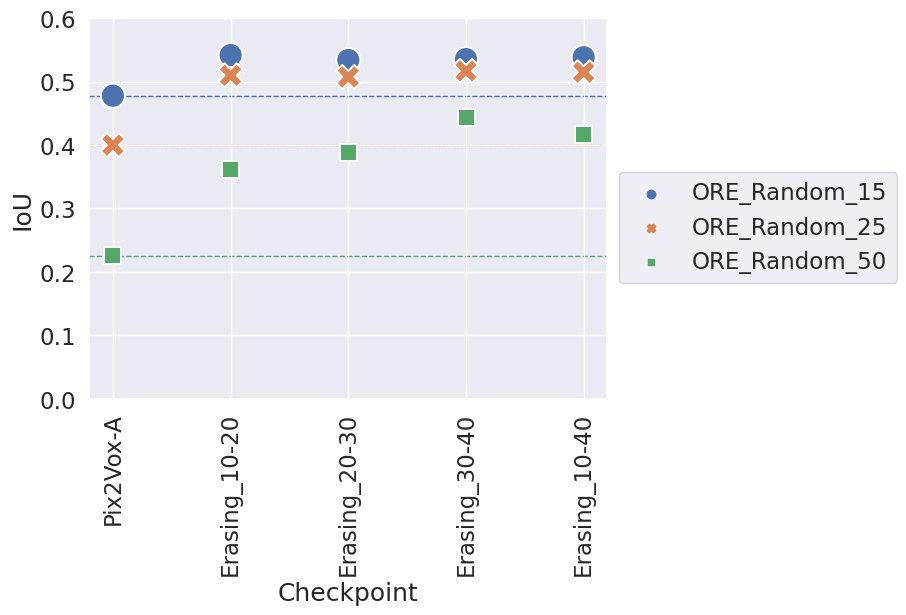

In [7]:
compare_ore(df)

#### ORE_Random_Single-View

In [311]:
pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ORE_Random_SingleView_Inpainting/pandas/"
df_single = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df_single["Checkpoint"] = pd.Categorical(df_single["Checkpoint"], ["Pix2Vox-A", "Erasing_10-20", "Erasing_20-30", "Erasing_30-40", "Erasing_10-40"])
df_single["Dataset"] = pd.Categorical(df_single["Dataset"], ["ORE_Random_Inpainting_15", "ORE_Random_Inpainting_25", "ORE_Random_Inpainting_50"])

df_single = df_single.sort_values(["Checkpoint","Dataset"]).reset_index(drop=True)

df_single['IoU change'] = df_single['Max IoU'].pct_change()
df_single['IoU change'][df_single['IoU change']>0] = np.NaN

print("Avg IoU loss over all fine-tuned models when going from ORE_15% to ORE_25%")
print(df_single['IoU change'][(df_single['Dataset']=="ORE_Random_Inpainting_25")].mean())
print("Avg IoU loss over all fine-tuned models when going from ORE_25% to ORE_50%")
print(df_single['IoU change'][(df_single['Dataset']=="ORE_Random_Inpainting_50")].mean())

print("Avg IoU over all fine-tuned models on ORE_15%")
print(df_single['Max IoU'][(df_single['Dataset']=="ORE_Random_Inpainting_15") & (df_single["Checkpoint"]!="Pix2Vox-A")].mean())
print("Avg IoU over all fine-tuned models on ORE_25%")
print(df_single['Max IoU'][(df_single['Dataset']=="ORE_Random_Inpainting_25") & (df_single["Checkpoint"]!="Pix2Vox-A")].mean())
print("Avg IoU over all fine-tuned models on ORE_50%")
print(df_single['Max IoU'][(df_single['Dataset']=="ORE_Random_Inpainting_50") & (df_single["Checkpoint"]!="Pix2Vox-A")].mean())
df_single

Avg IoU loss over all fine-tuned models when going from ORE_15% to ORE_25%
-0.03274739234941089
Avg IoU loss over all fine-tuned models when going from ORE_25% to ORE_50%
-0.14383822660183976
Avg IoU over all fine-tuned models on ORE_15%
0.4157811411261468
Avg IoU over all fine-tuned models on ORE_25%
0.4026980746655664
Avg IoU over all fine-tuned models on ORE_50%
0.34694017629810325


/tmp/ipykernel_5644/3531737189.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single['IoU change'][df_single['IoU change']>0] = np.NaN


,Dataset,Checkpoint,Max IoU,t=0.20,t=0.30,t=0.40,t=0.50,IoU change
0,ORE_Random_Inpainting_15,Pix2Vox-A,0.424348,0.424348,0.413575,0.395498,0.364233,NaN
1,ORE_Random_Inpainting_25,Pix2Vox-A,0.408379,0.408379,0.396989,0.378228,0.347095,-0.037631
2,ORE_Random_Inpainting_50,Pix2Vox-A,0.341071,0.341071,0.326485,0.305360,0.271796,-0.164818
3,ORE_Random_Inpainting_15,Erasing_10-20,0.400369,0.394308,0.400369,0.390973,0.356413,NaN
4,ORE_Random_Inpainting_25,Erasing_10-20,0.385980,0.380645,0.385980,0.375786,0.341261,-0.035940
5,ORE_Random_Inpainting_50,Erasing_10-20,0.329597,0.326454,0.329597,0.316106,0.274066,-0.146077
6,ORE_Random_Inpainting_15,Erasing_20-30,0.416248,0.408756,0.416248,0.408196,0.383945,NaN
7,ORE_Random_Inpainting_25,Erasing_20-30,0.403328,0.395611,0.403328,0.396112,0.372043,-0.031038
8,ORE_Random_Inpainting_50,Erasing_20-30,0.347255,0.342278,0.347255,0.337013,0.307636,-0.139027
9,ORE_Random_Inpainting_15,Erasing_30-40,0.427109,0.417391,0.427109,0.413082,0.375250,NaN


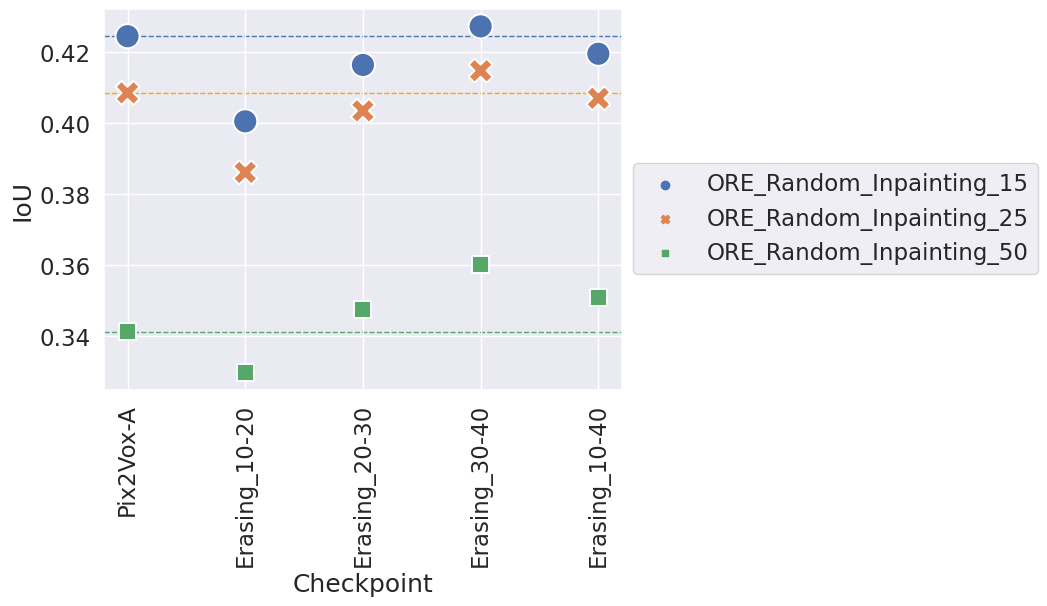

In [319]:
compare_ore(df_single)

### ORE_Random_MultiView

In [312]:
pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ORE_Random_MultiView_Inpainting/pandas/"
df_multi = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df_multi["Checkpoint"] = pd.Categorical(df_multi["Checkpoint"], ["Pix2Vox-A","Erasing_10-20", "Erasing_20-30", "Erasing_30-40", "Erasing_10-40"])
df_multi["Dataset"] = pd.Categorical(df_multi["Dataset"], ["ORE_Random_Inpainting_15", "ORE_Random_Inpainting_25", "ORE_Random_Inpainting_50"])

df_multi= df_multi.replace('ORE_Random_Inpainting_15','ORE_Random_Combined_15')
df_multi= df_multi.replace('ORE_Random_Inpainting_25','ORE_Random_Combined_25')
df_multi= df_multi.replace('ORE_Random_Inpainting_50','ORE_Random_Combined_50')

df_multi = df_multi.sort_values(["Checkpoint","Dataset"]).reset_index(drop=True)

df_multi

,Dataset,Checkpoint,Max IoU,t=0.20,t=0.30,t=0.40,t=0.50
0,ORE_Random_Combined_15,Pix2Vox-A,0.477059,0.477059,0.460386,0.439773,0.410907
1,ORE_Random_Combined_25,Pix2Vox-A,0.434521,0.434521,0.412561,0.388110,0.354757
2,ORE_Random_Combined_50,Pix2Vox-A,0.318807,0.318807,0.287971,0.257793,0.221843
3,ORE_Random_Combined_15,Erasing_10-20,0.505307,0.505307,0.500461,0.484479,0.455895
4,ORE_Random_Combined_25,Erasing_10-20,0.474388,0.474388,0.466723,0.446822,0.413542
5,ORE_Random_Combined_50,Erasing_10-20,0.369553,0.369553,0.353199,0.319792,0.266141
6,ORE_Random_Combined_15,Erasing_20-30,0.504516,0.504516,0.496000,0.475656,0.448224
7,ORE_Random_Combined_25,Erasing_20-30,0.479561,0.479561,0.469972,0.446563,0.415737
8,ORE_Random_Combined_50,Erasing_20-30,0.391896,0.391896,0.375560,0.340749,0.292513
9,ORE_Random_Combined_15,Erasing_30-40,0.509412,0.509412,0.500206,0.475235,0.441509


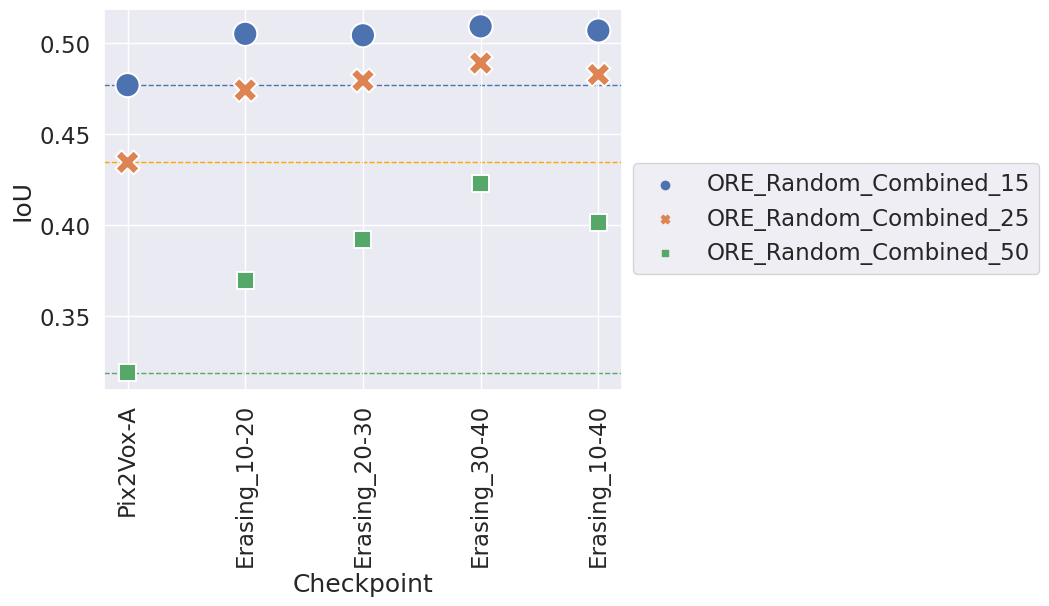

In [321]:
compare_ore(df_multi)

### Summary

In [8]:
pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ORE_Random_MultiView_Inpainting/pandas/"
df_multi = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df_multi= df_multi.replace('ORE_Random_Inpainting_15','ORE_Random_MultiView_15')
df_multi= df_multi.replace('ORE_Random_Inpainting_25','ORE_Random_MultiView_25')
df_multi= df_multi.replace('ORE_Random_Inpainting_50','ORE_Random_MultiView_50')


pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ORE_Random_SingleView_Inpainting/pandas/"
df_single = pd.read_csv(pandas_path+"ALL_evaluation.csv")
pandas_path = "/home/davide/Desktop/Dissertation/Models/Pix2Vox/output-ORE_Random/pandas/"
df = pd.read_csv(pandas_path+"ALL_evaluation.csv")

df_all = pd.concat([df,df_single,df_multi], axis=0)

mask_size = [ dataset.split("_")[-1] for dataset in df_all["Dataset"].values.tolist()]
df_all["Erasing area %"] = mask_size

# df_all["Checkpoint"] = pd.Categorical(df_all["Checkpoint"], ["Pix2Vox-A", "Erasing_30-40"])

Approach = (["W/O Inpainting"]*3*5)
Approach.extend(["Inpainting"]*3*5)
Approach.extend(["Combined"]*3*5)

df_all["Approach"] = Approach

df_all

,Dataset,Checkpoint,Max IoU,t=0.20,t=0.30,t=0.40,t=0.50,Erasing area %,Approach
0,ORE_Random_15,Erasing_10-40,0.538291,0.538291,0.528254,0.508026,0.482926,15,W/O Inpainting
1,ORE_Random_25,Erasing_10-40,0.514726,0.514726,0.502260,0.478086,0.448928,25,W/O Inpainting
2,ORE_Random_50,Erasing_10-40,0.416499,0.416499,0.390554,0.344531,0.287092,50,W/O Inpainting
3,ORE_Random_15,Erasing_10-20,0.541734,0.541734,0.533225,0.516020,0.490685,15,W/O Inpainting
4,ORE_Random_25,Erasing_10-20,0.509810,0.509810,0.496554,0.473425,0.440643,25,W/O Inpainting
5,ORE_Random_50,Erasing_10-20,0.360715,0.360715,0.329934,0.286656,0.227487,50,W/O Inpainting
6,ORE_Random_15,Pix2Vox-A,0.477722,0.477722,0.458111,0.436237,0.406498,15,W/O Inpainting
7,ORE_Random_25,Pix2Vox-A,0.399899,0.399899,0.373128,0.346163,0.310910,25,W/O Inpainting
8,ORE_Random_50,Pix2Vox-A,0.225373,0.225373,0.191595,0.162083,0.128475,50,W/O Inpainting
9,ORE_Random_15,Erasing_30-40,0.535396,0.535396,0.520199,0.495015,0.465461,15,W/O Inpainting


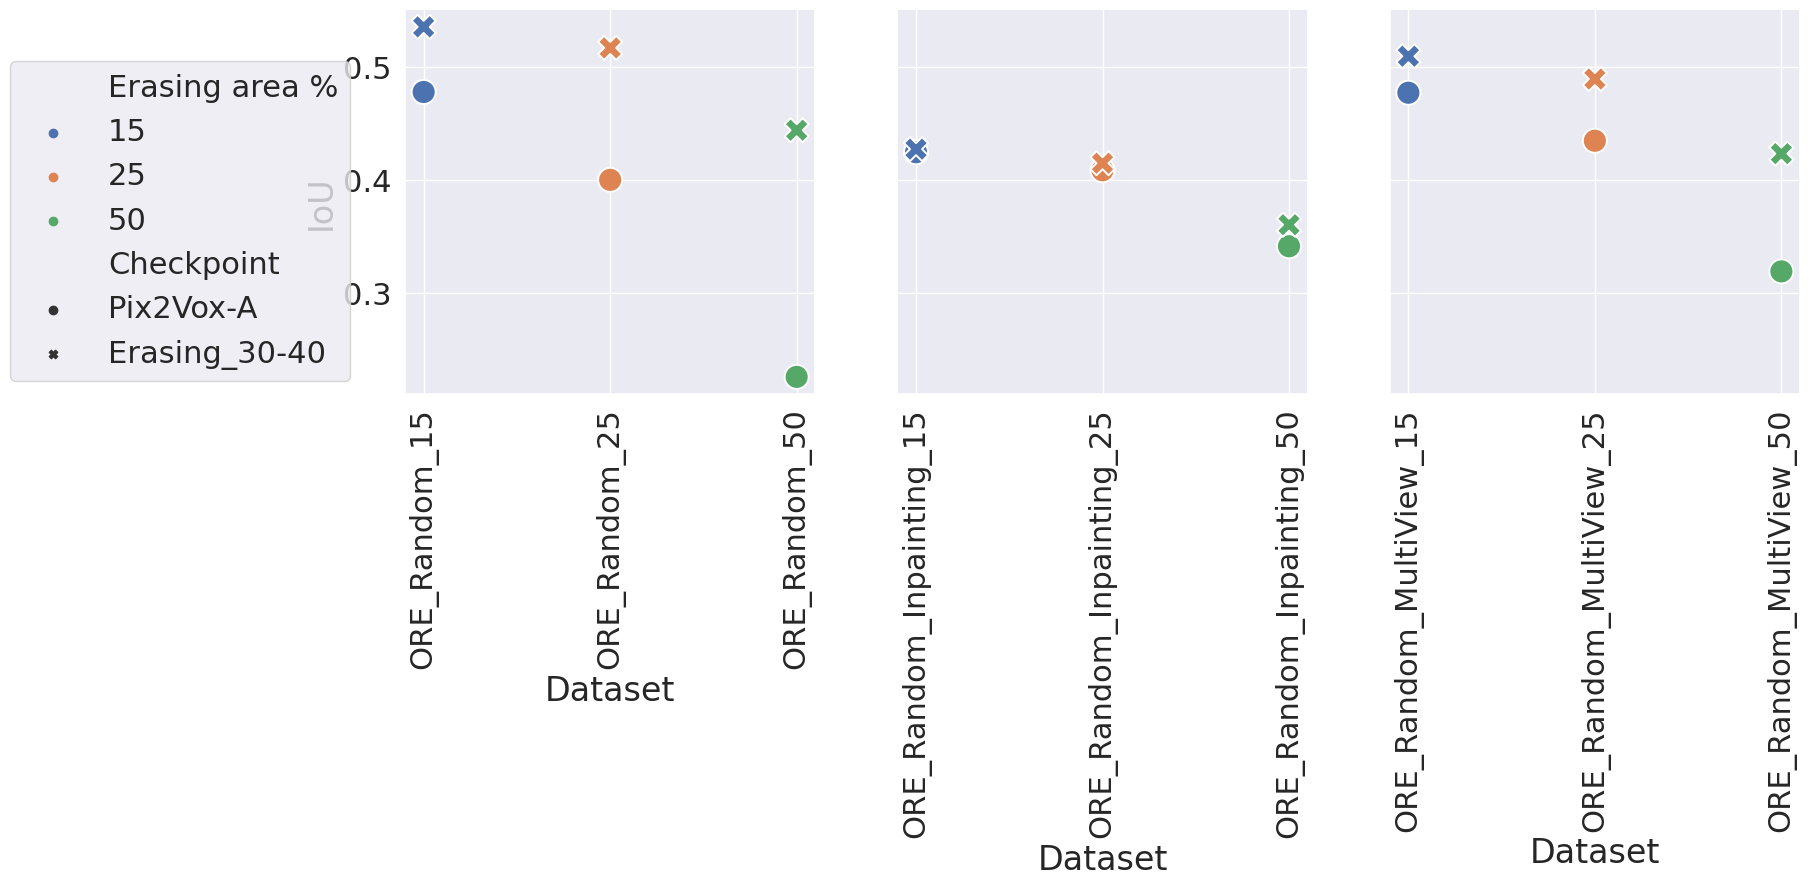

In [352]:
fig, ax = plt.subplots(ncols=3, figsize=(18,5), sharey=True)
g = sns.scatterplot(data=df_all[df_all["Erasing area %"]=="Occluded"], x="Dataset", y="Max IoU", hue="Erasing area %", style="Checkpoint", s=300, ax=ax[0])
g.set_ylabel("IoU")
a = sns.scatterplot(data=df_all[df_all["Erasing area %"]=="Inpainted"], x="Dataset", y="Max IoU", hue="Erasing area %", style="Checkpoint", s=300, ax=ax[1])
f = sns.scatterplot(data=df_all[df_all["Erasing area %"]=="Combined"], x="Dataset", y="Max IoU", hue="Erasing area %", style="Checkpoint", s=300, ax=ax[2])

ax[0].legend(loc='center left', bbox_to_anchor=(-1, 0.45))
a.get_legend().remove()
f.get_legend().remove()
plt.setp(g.get_xticklabels(), rotation=90)
plt.setp(a.get_xticklabels(), rotation=90)
plt.setp(f.get_xticklabels(), rotation=90)
print()

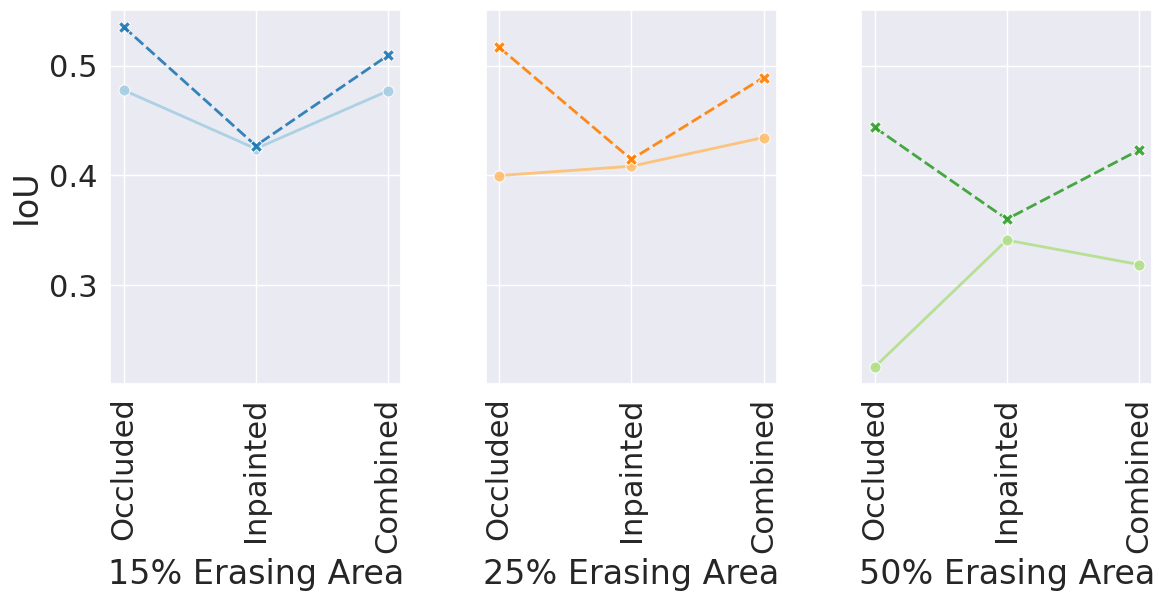

In [472]:
df_all = df_all[(df_all["Checkpoint"]=="Erasing_30-40") | (df_all["Checkpoint"]=="Pix2Vox-A")]

fig, ax = plt.subplots(ncols=3, figsize=(12,5), sharey=True)
fig.tight_layout()
g = sns.lineplot(data=df_all[df_all["Erasing area %"]=="15"], x="Approach",y="Max IoU", hue="Checkpoint", palette=sns.color_palette("Paired")[0:2], style="Checkpoint", linewidth=2, ms=8,  markers=True, alpha=.9,  ax=ax[0])
g.set_ylabel("IoU")
g.set_xlabel("15% Erasing Area")
a = sns.lineplot(data=df_all[df_all["Erasing area %"]=="25"], x="Approach",y="Max IoU", hue="Checkpoint", palette=sns.color_palette("Paired")[6:8] ,style="Checkpoint", linewidth=2, ms=8,  markers=True, alpha=.9,  ax=ax[1])
a.set_xlabel("25% Erasing Area")
f = sns.lineplot(data=df_all[df_all["Erasing area %"]=="50"], x="Approach",y="Max IoU", hue="Checkpoint", palette=sns.color_palette("Paired")[2:4], style="Checkpoint", linewidth=2, ms=8,  markers=True, alpha=.9,  ax=ax[2])
f.set_xlabel("50% Erasing Area")

# ax[0].legend(loc='center left', bbox_to_anchor=(5, 0.45))
g.get_legend().remove()
a.get_legend().remove()
f.get_legend().remove()
plt.setp(g.get_xticklabels(), rotation=90)
plt.setp(a.get_xticklabels(), rotation=90)
plt.setp(f.get_xticklabels(), rotation=90)
print()

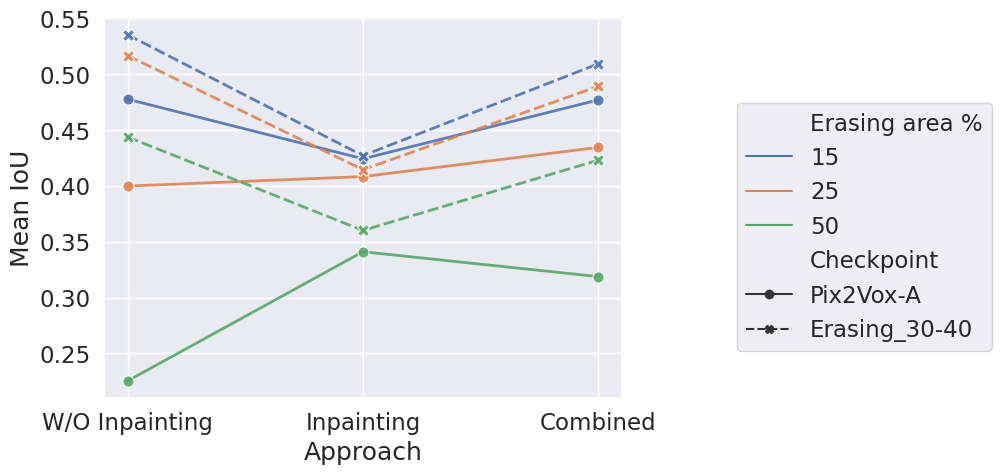

In [11]:
df_all = df_all[(df_all["Checkpoint"]=="Erasing_30-40") | (df_all["Checkpoint"]=="Pix2Vox-A")]

sns.set(font_scale=1.5)

fig, ax = plt.subplots(ncols=1)
fig.tight_layout()
g = sns.lineplot(data=df_all, x="Approach", y="Max IoU", style="Checkpoint", hue="Erasing area %", linewidth=2, ms=8,  markers=True, alpha=.9, ax=ax)
g.set_ylabel("Mean IoU")
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.45))
# plt.setp(g.get_xticklabels(), rotation=90)

In [23]:
df_all

,Dataset,Checkpoint,Max IoU,t=0.20,t=0.30,t=0.40,t=0.50,Erasing area %,Approach
6,ORE_Random_15,Pix2Vox-A,0.477722,0.477722,0.458111,0.436237,0.406498,15,W/O Inpainting
7,ORE_Random_25,Pix2Vox-A,0.399899,0.399899,0.373128,0.346163,0.310910,25,W/O Inpainting
8,ORE_Random_50,Pix2Vox-A,0.225373,0.225373,0.191595,0.162083,0.128475,50,W/O Inpainting
9,ORE_Random_15,Erasing_30-40,0.535396,0.535396,0.520199,0.495015,0.465461,15,W/O Inpainting
10,ORE_Random_25,Erasing_30-40,0.516775,0.516775,0.498908,0.469549,0.435744,25,W/O Inpainting
11,ORE_Random_50,Erasing_30-40,0.443849,0.443849,0.410905,0.359228,0.300153,50,W/O Inpainting
6,ORE_Random_Inpainting_15,Pix2Vox-A,0.424348,0.424348,0.413575,0.395498,0.364233,15,Inpainting
7,ORE_Random_Inpainting_25,Pix2Vox-A,0.408379,0.408379,0.396989,0.378228,0.347095,25,Inpainting
8,ORE_Random_Inpainting_50,Pix2Vox-A,0.341071,0.341071,0.326485,0.305360,0.271796,50,Inpainting
9,ORE_Random_Inpainting_15,Erasing_30-40,0.427109,0.417391,0.427109,0.413082,0.375250,15,Inpainting


In [22]:
print("Mean of Erasing_30-40 by approach")
print(df_all[df_all["Checkpoint"]=="Erasing_30-40"].groupby(["Approach"])["Max IoU"].mean())

print("Mean of Pix2Vox-A by approach")
print(df_all[df_all["Checkpoint"]=="Pix2Vox-A"].groupby(["Approach"])["Max IoU"].mean())

Mean of Erasing_30-40 by approach
Approach
Combined          0.473916
Inpainting        0.400624
W/O Inpainting    0.498674
Name: Max IoU, dtype: float64
Mean of Pix2Vox-A by approach
Approach
Combined          0.410129
Inpainting        0.391266
W/O Inpainting    0.367665
Name: Max IoU, dtype: float64
